<a href="https://colab.research.google.com/github/KimJunGu9/ADP_basic/blob/main/3_3_%EA%B2%B0%EC%B8%A1%EC%B9%98%2C%EC%9D%B4%EC%83%81%EC%B9%98_%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 결측치 이상치 처리하기

# 결측치 인식

# dataframe.isna()
# 데이터의 요소가 결측치일 경우 True를 반환하고, 그렇지 않을 경우 False 반환
# .isna() = .isnull()
# 변수별로 데이터의 각 행에 결측치가 있는지 확인 후 반환
# 합을 구해 결측치의 갯수를 쉽게 파악 가능



# 결측치가 있는/없는 행 확인
# na가 있는 행들 저장 : df_row_with_na = df[df.isna().any(axis = 1)]
# na가 없는 행들 저장 : df_row_without_na = df.dropna()

In [2]:
# airquality 데이터의 Ozone 변수에 대한 결측치 여부를 파악하고, 만약 결측치가 있다면 그 개수를 확인해라

In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
air = pd.read_csv('/content/drive/MyDrive/ADP/Part.1/2.데이터_핸들링/data/airquality.csv')
print(air)

     Ozone  Solar.R  Wind  Temp  Month  Day
0     41.0    190.0   7.4    67      5    1
1     36.0    118.0   8.0    72      5    2
2     12.0    149.0  12.6    74      5    3
3     18.0    313.0  11.5    62      5    4
4      NaN      NaN  14.3    56      5    5
..     ...      ...   ...   ...    ...  ...
148   30.0    193.0   6.9    70      9   26
149    NaN    145.0  13.2    77      9   27
150   14.0    191.0  14.3    75      9   28
151   18.0    131.0   8.0    76      9   29
152   20.0    223.0  11.5    68      9   30

[153 rows x 6 columns]


In [7]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [9]:
# Ozone변수에 존재하는 na의 개수 산출

air.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [10]:
air['Ozone'].isna()

0      False
1      False
2      False
3      False
4       True
       ...  
148    False
149     True
150    False
151    False
152    False
Name: Ozone, Length: 153, dtype: bool

In [11]:
air[air['Ozone'].isna()]

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5
9,NaN,194.0,8.6,69,5,10
24,NaN,66.0,16.6,57,5,25
25,NaN,266.0,14.9,58,5,26
26,NaN,NaN,8.0,57,5,27
31,NaN,286.0,8.6,78,6,1
32,NaN,287.0,9.7,74,6,2
33,NaN,242.0,16.1,67,6,3
34,NaN,186.0,9.2,84,6,4
35,NaN,220.0,8.6,85,6,5


In [12]:
# Ozone 변수에서 na가 아닌 값과 na 값의 개수 비교

tb = air['Ozone'].isna().value_counts()
tb

False    116
True      37
Name: Ozone, dtype: int64

In [13]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [14]:
# airquality 데이터에서 결측치가 하나라도 존재하는 행들을 air_na 변수에 저장하고
# 결측치를 하나도 가지지 않는 행들을 air_com 변수에 저장하기

In [15]:
air

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [16]:
air[air.isna().any(axis = 1)]

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
9,NaN,194.0,8.6,69,5,10
10,7.0,NaN,6.9,74,5,11
24,NaN,66.0,16.6,57,5,25
25,NaN,266.0,14.9,58,5,26
26,NaN,NaN,8.0,57,5,27
31,NaN,286.0,8.6,78,6,1
32,NaN,287.0,9.7,74,6,2
33,NaN,242.0,16.1,67,6,3


In [17]:
len(air[air.isna().any(axis = 1)])

42

In [18]:
air_com = air.dropna()
air_com

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,9,25
148,30.0,193.0,6.9,70,9,26
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


# 결측치 처리

#  결측치 대치법 이해

가.단순 대치법
* complete analysis : 결측값이 존재하는 행 삭제
* 평균 대치법 : 관측 또는 실험을 통해 얻어진 데이터의 평균으로 결측치 대치
* 단순확률 대치법 : Hot-deck 방법, nearest neighbor 방법 등
    
나. 다중 대치법
* 단순 대치법을 m번 수행해 m개의 가상적 완전 자료를 만듦
* [대치] - [분석] - [결합] 단계

In [19]:
# 결측치 제거

# 데이터명.dropna() :	행 기준으로 결측치가 있는 행은 모두 삭제
# 데이터명.dropna(axis=1) :	열 기준으로 결측치가 있는 열은 모두 삭제
# 데이터명.dropna(how='all') :	행 전체가 결측값인 행만 삭제
# 데이터명.dropna(thresh=2) :	결측치의 갯수 수치를 지정해서 임계치를 넘어가면 삭제
# 데이터명.dropna(subset=['컬럼명1', '컬럼명2']) :	특정 컬럼 내의 결측치만 삭제
# 데이터명.dropna(inplace=True) :	결측치 제거한 상태를 바로 적용

In [20]:
# 결측치 대치법

# 데이터명.fillna(0) :	결측값을 0으로 대체
# 데이터명.fillna(method='ffill 또는 'pad')	: 결측값을 앞방향으로 채워나감
# 데이터명.fillna(method='bfill' 또는 'backfill') :	결측값을 뒷 방향으로 채워나감
# 데이터명.fillna(method='ffill', limit=1) :	앞/뒤 방향으로 결측값을 채우는 횟수를 1번으로 제한
# 데이터명.fillna(데이터명.mean()) :	결측값을 변수별 평균으로 대체
# 데이터명.dropna(inplace=True) :	결측치 제거한 상태를 바로 적용
# 데이터명.fillna(데이터명.median()) : 	결측치를 중앙값으로 대체
# 데이터명['컬럼명'].describe()['top'] :	범주형 변수 열의 최빈값으로 결측치를 대체

In [21]:
# airquality의 Ozone 변수값이 존재하지 않는 경우, Ozone 변수 값들의 평균으로 대치하기

In [22]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [23]:
air

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [24]:
air['Ozone'].mean()

42.12931034482759

In [25]:
air['Ozone'] = air['Ozone'].fillna(air['Ozone'].mean())

In [26]:
air

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.0,7.4,67,5,1
1,36.00000,118.0,8.0,72,5,2
2,12.00000,149.0,12.6,74,5,3
3,18.00000,313.0,11.5,62,5,4
4,42.12931,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.00000,193.0,6.9,70,9,26
149,42.12931,145.0,13.2,77,9,27
150,14.00000,191.0,14.3,75,9,28
151,18.00000,131.0,8.0,76,9,29


In [27]:
# 사이킷런을 활용한 결측치 대치 - KNN

In [28]:
from sklearn.impute import KNNImputer

In [30]:
air = pd.read_csv('/content/drive/MyDrive/ADP/Part.1/2.데이터_핸들링/data/airquality.csv')

In [31]:
imputer = KNNImputer(n_neighbors = 2)

In [32]:
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [33]:
air_filled = imputer.fit_transform(air)
air_filled

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [ 18.5, 206. ,  14.3,  56. ,   5. ,   5. ],
       [ 28. , 270.5,  14.9,  66. ,   5. ,   6. ],
       [ 23. , 299. ,   8.6,  65. ,   5. ,   7. ],
       [ 19. ,  99. ,  13.8,  59. ,   5. ,   8. ],
       [  8. ,  19. ,  20.1,  61. ,   5. ,   9. ],
       [ 17.5, 194. ,   8.6,  69. ,   5. ,  10. ],
       [  7. , 109. ,   6.9,  74. ,   5. ,  11. ],
       [ 16. , 256. ,   9.7,  69. ,   5. ,  12. ],
       [ 11. , 290. ,   9.2,  66. ,   5. ,  13. ],
       [ 14. , 274. ,  10.9,  68. ,   5. ,  14. ],
       [ 18. ,  65. ,  13.2,  58. ,   5. ,  15. ],
       [ 14. , 334. ,  11.5,  64. ,   5. ,  16. ],
       [ 34. , 307. ,  12. ,  66. ,   5. ,  17. ],
       [  6. ,  78. ,  18.4,  57. ,   5. ,  18. ],
       [ 30. , 322. ,  11.5,  68. ,   5. ,  19. ],
       [ 11. ,  44. ,   9.7,  6

In [34]:
pre_air = pd.DataFrame(air_filled,columns=air.columns)

In [35]:
pre_air

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5.0,1.0
1,36.0,118.0,8.0,72.0,5.0,2.0
2,12.0,149.0,12.6,74.0,5.0,3.0
3,18.0,313.0,11.5,62.0,5.0,4.0
4,18.5,206.0,14.3,56.0,5.0,5.0
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70.0,9.0,26.0
149,24.5,145.0,13.2,77.0,9.0,27.0
150,14.0,191.0,14.3,75.0,9.0,28.0
151,18.0,131.0,8.0,76.0,9.0,29.0


In [36]:
pre_air.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [37]:
# 이상치 인식

# 사분위수

# 데이터명.describe()
# 결측치가 아닌 데이터행의 개수
# 평균/표준편차
# 최소/최댓값
# Q1, Q2, Q3 나타내줌
# IQR을 이용한 이상치 탐색 : 함수 생성

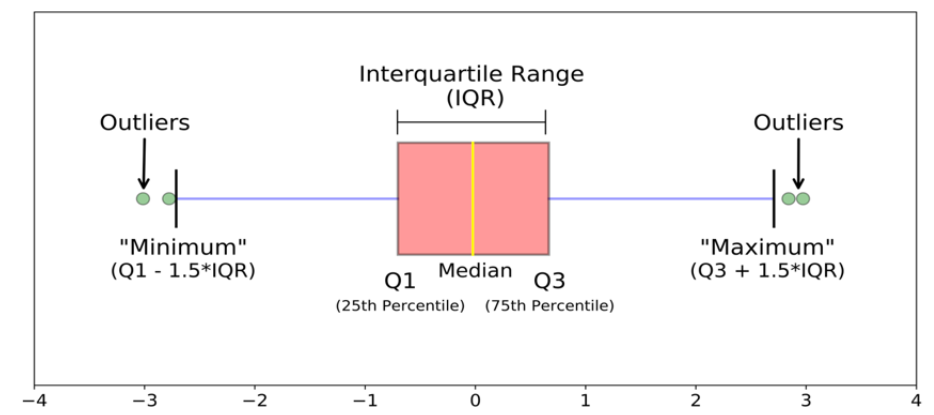

<Axes: xlabel='Ozone'>

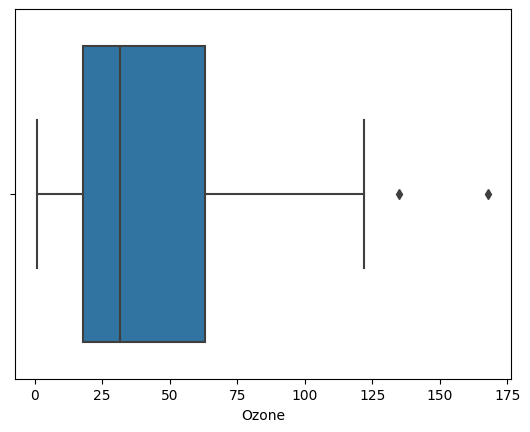

In [38]:
# Ozone 변수에서 이상치를 박스플롯으로 확인

import seaborn as sns

sns.boxplot(x='Ozone', data=air)

In [39]:
# IQR 을 이용한 이상치 탐색 함수

def detect_outliers(df=None, column=None, weight=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    IQR_weight = IQR*weight
    
    outlier_idx = df[(df[column] < Q1 - IQR_weight) | (df[column] > Q3 + IQR_weight)].index
    
    return outlier_idx

In [40]:
# IQR로 이상치를 찾아 인덱스 저장되어 있음 

out_index = detect_outliers(df=air, column='Ozone')
out_index

Int64Index([61, 116], dtype='int64')

In [41]:
air.loc[out_index,'outlier']=True

In [42]:
air[air['outlier']==True]

,Ozone,Solar.R,Wind,Temp,Month,Day,outlier
61,135.0,269.0,4.1,84,7,1,True
116,168.0,238.0,3.4,81,8,25,True


In [43]:
# outlier 대체 (중위 값 혹은 평균값으로)

air.loc[out_index,'Ozone'] = air['Ozone'].median()
air.loc[out_index,'Ozone'] 

61     31.5
116    31.5
Name: Ozone, dtype: float64

<Axes: xlabel='Ozone'>

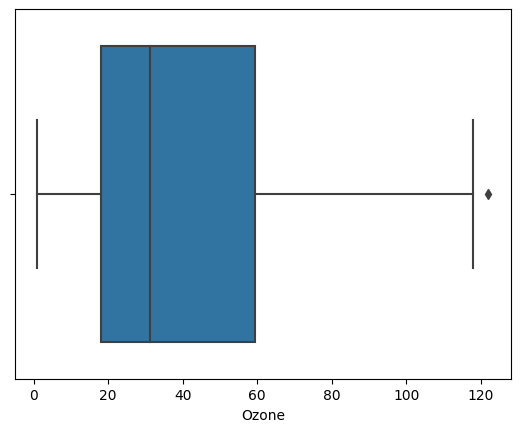

In [44]:
sns.boxplot(x='Ozone', data=air)

In [45]:
out_index = detect_outliers(df=air, column='Ozone')
out_index

Int64Index([98], dtype='int64')

In [46]:
# outlier 제거

air_2 = air.drop(out_index).reset_index(drop=True)

In [47]:
air_2

,Ozone,Solar.R,Wind,Temp,Month,Day,outlier
0,41.0,190.0,7.4,67,5,1,NaN
1,36.0,118.0,8.0,72,5,2,NaN
2,12.0,149.0,12.6,74,5,3,NaN
3,18.0,313.0,11.5,62,5,4,NaN
4,NaN,NaN,14.3,56,5,5,NaN
...,...,...,...,...,...,...,...
147,30.0,193.0,6.9,70,9,26,NaN
148,NaN,145.0,13.2,77,9,27,NaN
149,14.0,191.0,14.3,75,9,28,NaN
150,18.0,131.0,8.0,76,9,29,NaN


<Axes: xlabel='Ozone'>

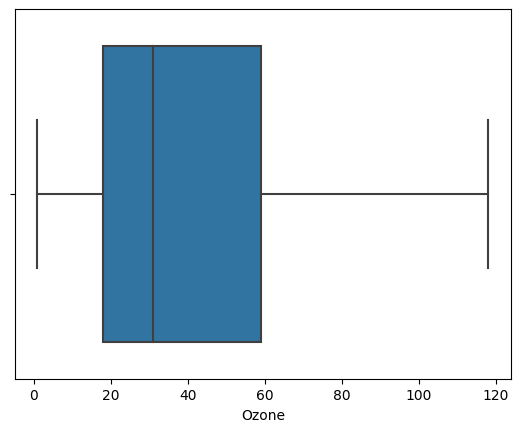

In [48]:
sns.boxplot(x='Ozone', data=air_2)